# HOME EQUITY LOAN

**Dataset:** HMEQ <br>
**Source:** http://www.creditriskanalytics.net/datasets-private2.html




The data set HMEQ reports characteristics and delinquency information for 5,960 home equity loans. A home equity loan is a loan where the obligor uses the equity of his or her home as the underlying collateral. The data set has the following characteristics:<br>
<br>
<br>
◾ BAD: 1 = applicant defaulted on loan or seriously delinquent; 0 = applicant paid loan <br>
◾ LOAN: Amount of the loan request <br>
◾ MORTDUE: Amount due on existing mortgage <br>
◾ VALUE: Value of current property <br>
◾ REASON: DebtCon = debt consolidation; HomeImp = home improvement <br>
◾ JOB: Occupational categories <br>
◾ YOJ: Years at present job <br>
◾ DEROG: Number of major derogatory reports <br>
◾ DELINQ: Number of delinquent credit lines <br>
◾ CLAGE: Age of oldest credit line in months <br>
◾ NINQ: Number of recent credit inquiries <br>
◾ CLNO: Number of credit lines <br>
◾ DEBTINC: Debt-to-income ratio

**Home Equity Loan** - adalah pinjaman di mana peminjam menggunakan ekuitas rumah mereka sebagai jaminan. Pinjaman ini memungkinkan Anda untuk meminjam sejumlah besar uang tunai berdasarkan nilai rumah Anda, yang ditentukan oleh penilai, dan ekuitas Anda saat ini.

Pinjaman ekuitas tersedia sebagai pinjaman dengan suku bunga tetap atau yang dapat disesuaikan dan datang dengan jumlah waktu tertentu untuk melunasi hutang, biasanya antara 5 dan 30 tahun. Anda akan membayar biaya penutupan, tetapi itu akan jauh lebih sedikit daripada apa yang Anda bayar pada hipotek penuh khas. HEL dengan suku bunga tetap juga menawarkan prediksi suku bunga reguler sejak awal, yang disukai beberapa peminjam.



# 1.IMPORT LIBRARY

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sp
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy.stats import pearsonr

import time
from sklearn import preprocessing

# Load the Drive helper and mount
# from google.colab import drive
# from google.colab import files

# This will prompt for authorization.
# drive.mount('/content/drive')

from tqdm import tqdm
tqdm.pandas()
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# 2.LOAD DATASET

In [3]:
df = pd.read_csv('HMEQ_CLEAN.CSV')

In [4]:
df

,Unnamed: 0,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,34.818262
1,1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,34.818262
2,2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,34.818262
3,3,1,1500,65019.0,89235.5,DebtCon,Other,7.0,0.0,0.0,173.466667,1.0,20.0,34.818262
4,4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,34.818262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True) # drop fitur Unnamed: 0

# 3.CEK INFO DARI DATASET

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5960 non-null   float64
 3   VALUE    5960 non-null   float64
 4   REASON   5960 non-null   object 
 5   JOB      5960 non-null   object 
 6   YOJ      5960 non-null   float64
 7   DEROG    5960 non-null   float64
 8   DELINQ   5960 non-null   float64
 9   CLAGE    5960 non-null   float64
 10  NINQ     5960 non-null   float64
 11  CLNO     5960 non-null   float64
 12  DEBTINC  5960 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


Berdasarkan info di atas terdapat:<br>
1. 1 fitur target yaitu BAD
2. 2 fitur bertipe data objek, yaitu REASON dan MORTDUE
3. Sisanya adalah fitur-fitur bertipe data float dan int

# 4.Univariate Analysis

## 4.1 FITUR BAD

jumlah yang layak mendapat pinjaman 1189
jumlah yang tidak layak mendapat pinjaman 4771


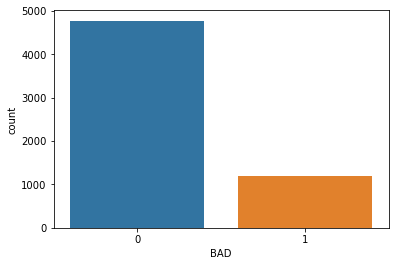

In [7]:
sns.countplot(x= 'BAD', data=df)
print(f'jumlah yang layak mendapat pinjaman {df.BAD.value_counts()[1]}')
print(f'jumlah yang tidak layak mendapat pinjaman {df.BAD.value_counts()[0]}')
# plt.savefig('./storage/fitur bad.png')

Berdasarkan countplot di atas, terlihat fitur target terjadi Imbalanced data. Oleh karena itu, pada saat proses modeling akan dilakukan resampling terlebih dahulu sebelum di fitting.<br>

resampling yang akan digunakan adalah:
1. ROS(Random Oversampling)
2. RUS(Random Undersampling)
3. SMOTE

## 4.2 FITUR LOAN

C:\Users\ASUS\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


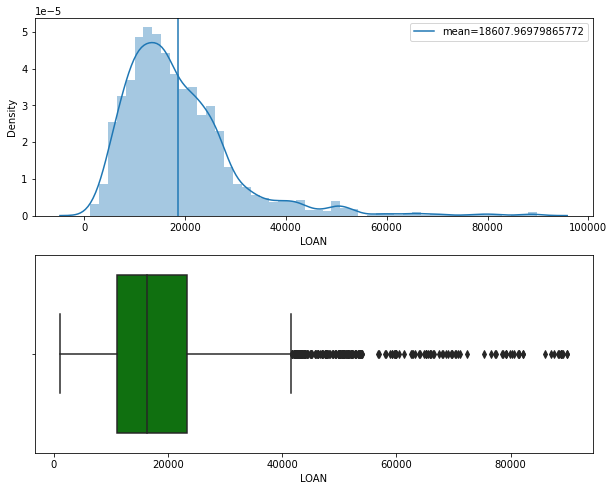

In [21]:
f = plt.figure(figsize=(10,8))

f.add_subplot(2,1,1)
sns.distplot(df['LOAN'])
c = df.LOAN.mean()
plt.axvline(df['LOAN'].mean(), label= (f'mean={c}'))
plt.legend()

f.add_subplot(2,1,2)
sns.boxplot(df['LOAN'], color='green')
# plt.savefig('./storage/fitur loan1.png')

Berdasarkan grafik di atas, 
1. berdasarkan grafik di atas, rata-rata besar pinjaman yang dibutuhkan dari seluruh sample pemohon berada pada USD18607 
2. terlihat data tidak berdistribusi normal dan memiliki skewness. 
3. Terdapat juga outlier yang lumayan banyak, outlier ini cukup beralasan karena setiap pemohon memiliki tingkatan ekuitas rumah yang berbeda-beda yang menyebabkan pemohon dapat meminjaman uang dengan jumlah yang berbeda-beda

## 4.3 FITUR MORTDUE

C:\Users\ASUS\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


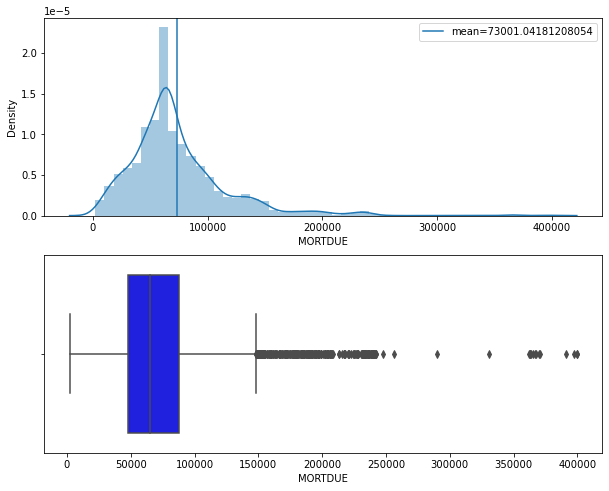

In [22]:
f = plt.figure(figsize=(10,8))

f.add_subplot(2,1,1)
sns.distplot(df['MORTDUE'])
c = df.MORTDUE.mean()
plt.axvline(df['MORTDUE'].mean(), label= (f'mean={c}'))
plt.legend()

f.add_subplot(2,1,2)
sns.boxplot(df['MORTDUE'], color='blue')
# plt.savefig('./storage/fitur mortdue2.png')

Berdasarkan grafik di atas,

1. berdasarkan grafik di atas, rata-rata besar hipotek ydari seluruh sample pemohon berada pada USD73001
2. terlihat data tidak berdistribusi normal dan memiliki skewness.
3. Terdapat juga outlier yang lumayan banyak, outlier ini cukup masuk akal karena hipotek setiap pemohon berbeda-beda

## 4.4 FITUR VALUE

C:\Users\ASUS\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


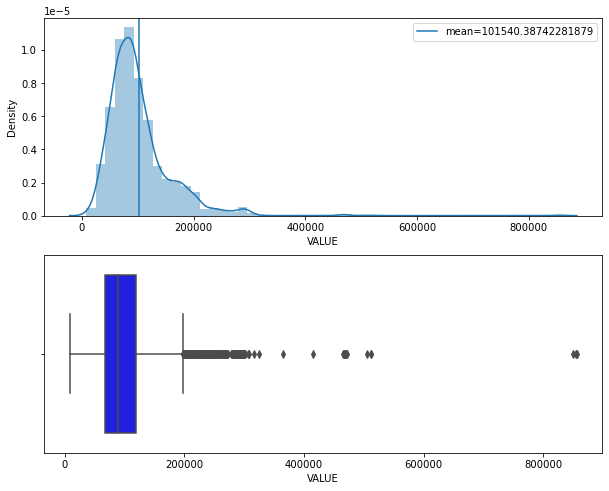

In [23]:
f = plt.figure(figsize=(10,8))

f.add_subplot(2,1,1)
sns.distplot(df['VALUE'])
# plt.axvline(95000, label='95000', color='red')
# plt.axvline(60000, label='60000', color='black')
c = df.VALUE.mean()
plt.axvline(df['VALUE'].mean(), label= (f'mean={c}'))
plt.legend()

f.add_subplot(2,1,2)
sns.boxplot(df['VALUE'], color='blue')
# plt.savefig('./storage/fitur value2.png')

Berdasarkan grafik di atas,

1. berdasarkan grafik di atas, rata-rata harga properti rumah dari seluruh sample pemohon berada pada USD101540
2. terlihat data tidak berdistribusi normal dan memiliki skewness.
3. Terdapat juga outlier yang lumayan banyak, hal ini cukup masuk akal karena setiap pemohon memiliki harga properti rumah yang berbeda-beda

## 4.5 FITUR REASON

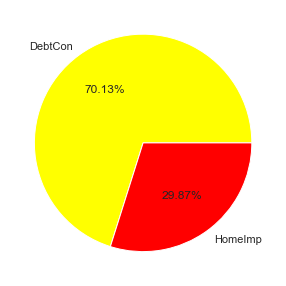

In [41]:
df_reason = df.REASON.value_counts().to_frame()

reason_label = list(df_reason.index)
plt.figure(figsize=(10,5))
plt.pie(df_reason['REASON'], labels=reason_label,
       autopct='%.2f%%',colors=['yellow','red'])
plt.show()
# plt.savefig('./storage/fitur reason.png')

1.Berdasarkan data yang kita miliki, pemohon akan menggunakan uang pinjamannya untuk tujuan DebitCon atau HomeImp.<br> 

2.Terlihat dari Piechart, pemohon dengan tujuan untuk DebitCon sebesar 70.13% dari total sample yang kita miliki  dan sisanya yaitu sebesar 20.87% dari total sample yang kita miliki yakni pemohon akan menggunakan uang pinjamannya untuk HomeImp.

# 4.6 FITUR JOB

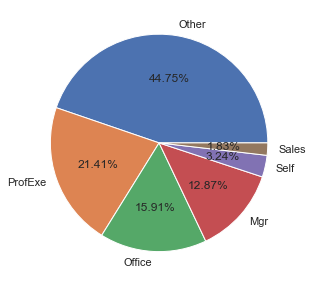

In [42]:
df_job = df.JOB.value_counts().to_frame()

job_label = list(df_job.index)
plt.figure(figsize=(10,5))
plt.pie(df_job['JOB'], labels=job_label,
       autopct='%.2f%%')
plt.show()
# plt.savefig('./storage/fitur job.png')

Terlihat dari Piechart, pemohon paling banyak bekerja di other sebesar 44.75% dan paling sedikit bekerja di sales sebesar 1.83%. Jika kita analisis, pekerjaan mempengaruhi seberapa besar harta yang pemohon miliki, hal itu yang menyebabkan nilai LOAN, MORTDUE, VALUE yang telah dijelaskan di atas memiliki nilai yang berbeda-beda bahkan ada sebagian yang menjadi outlier

## 4.7 FITUR YOJ

C:\Users\ASUS\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


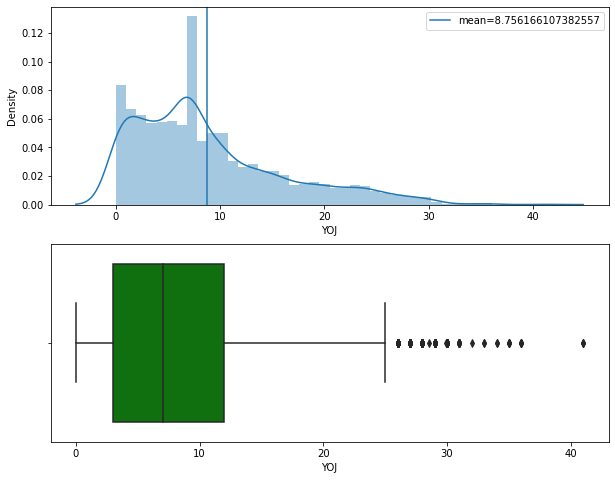

In [24]:
f = plt.figure(figsize=(10,8))

f.add_subplot(2,1,1)
sns.distplot(df['YOJ'])
c = df.YOJ.mean()
plt.axvline(df['YOJ'].mean(), label= (f'mean={c}'))
plt.legend()

f.add_subplot(2,1,2)
sns.boxplot(df['YOJ'], color='green')
# plt.savefig('./storage/fitur yoj2.png')

Berdasarkan grafik di atas,

1. berdasarkan grafik di atas, rata-rata lama berkarir dari seluruh sample pemohon sekitar 8 tahun
2. terlihat data tidak berdistribusi normal dan memiliki skewness.
3. Terdapat juga beberapa outlier, hal ini cukup masuk karena baik yang tidak bekerja dan yang bekerja boleh mengajukan pinjaman.

## 4.8 FITUR DEROG

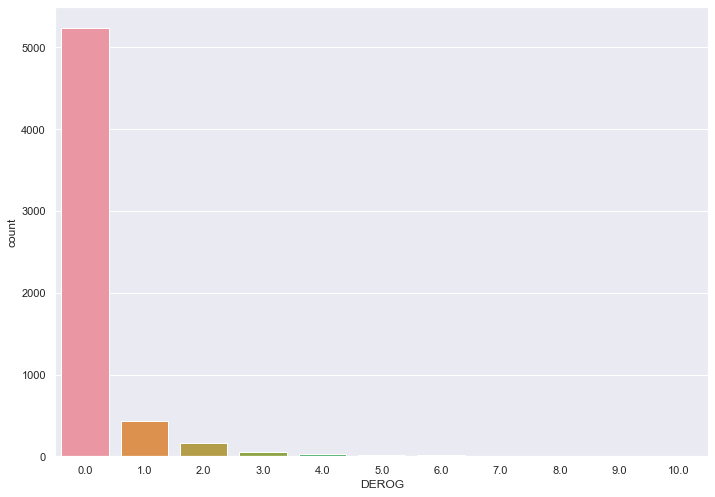

In [44]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
sns.countplot(x= 'DEROG', data=df)
# plt.savefig('./storage/fitur derog.png')

Berdasarkan countplot di atas, paling banyak pemohon yang mengajukan pinjaman dengan jumlah laporan derogatori yang masih nol.<br>
Hal tersebut masuk akal karena seseorang yang memiliki jumlah laporan derogatori cukup banyak sudah lebih memahami jika pengajuannya kemungkinan besar akan ditolak.

## 4.9 FITUR DELINQ

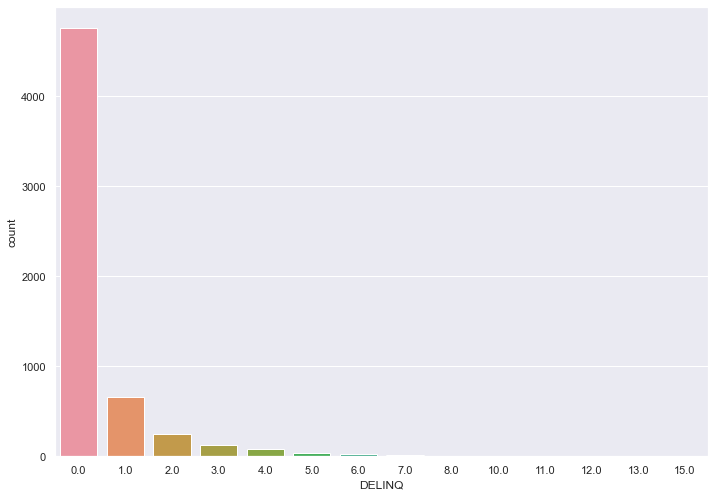

In [45]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
sns.countplot(x= 'DELINQ', data=df)
# plt.savefig('./storage/fitur delinq.png')

Berdasarkan countplot di atas, paling banyak pemohon yang mengajukan pinjaman dengan jumlah laporan tunggakan yang masih nol.<br>
Hal tersebut masuk akal karena menurut seseorang yang memiliki jumlah laporan tunggakan cukup banyak sudah lebih memahami jika pengajuannya kemungkinan besar akan ditolak.

## 4.10 FITUR CLAGE

C:\Users\ASUS\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


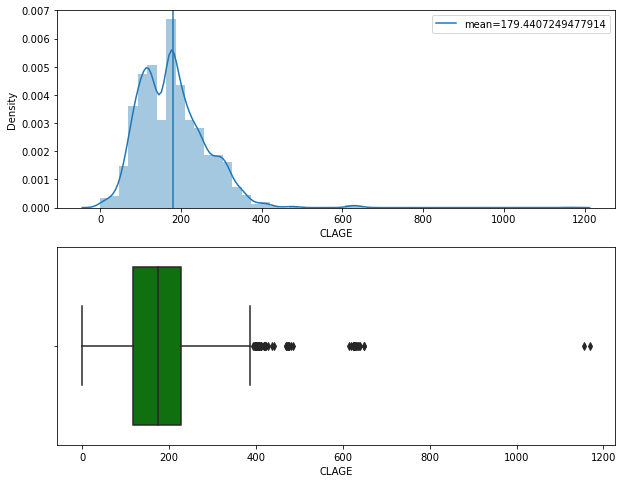

In [25]:
f = plt.figure(figsize=(10,8))

f.add_subplot(2,1,1)
sns.distplot(df['CLAGE'])
c = df.CLAGE.mean()
plt.axvline(df['CLAGE'].mean(), label= (f'mean={c}'))
plt.legend()

f.add_subplot(2,1,2)
sns.boxplot(df['CLAGE'], color='green')
plt.savefig('./storage/fitur clage2.png')

Berdasarkan grafik di atas,

1. berdasarkan grafik di atas, dari seluruh sample pemohon memiliki rata-rata sekitar 179 bulan lamanya menggunakan kartu kredit
2. terlihat data tidak berdistribusi normal dan memiliki skewness.
3. Terdapat juga beberapa outlier, kita perhatikan outlier yang mendekati 1200 bulan jika kita kalkulasi 1200 bulan/12 bulan = 100 tahun, outlier ini tidak masuk akal, sehingga outlier kemungkinan akan ini dihapus.

## 4.11 FITUR NINQ

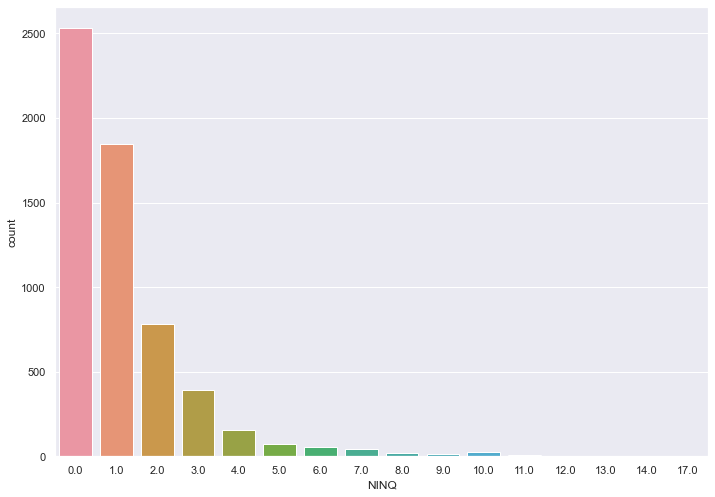

In [47]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
sns.countplot(x= 'NINQ', data=df)
# plt.savefig('./storage/fitur ninq.png')

Berdasarkan countplot di atas, sebagian besar pemohon yang mengajukan peminjaman dengan jumlah 0 kredit inquiri.

## 4.12  FITUR CLNO

C:\Users\ASUS\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


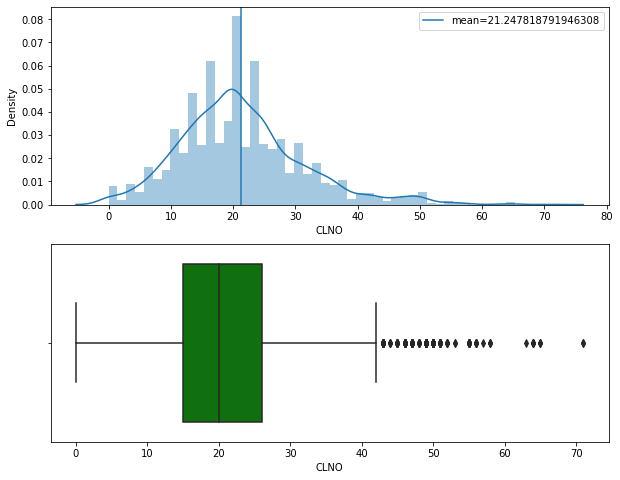

In [26]:
f = plt.figure(figsize=(10,8))

f.add_subplot(2,1,1)
sns.distplot(df['CLNO'])
c = df.CLNO.mean()
plt.axvline(df['CLNO'].mean(), label= (f'mean={c}'))
plt.legend()

f.add_subplot(2,1,2)
sns.boxplot(df['CLNO'], color='green')
plt.savefig('./storage/fitur clno2.png')

berdasarkan grafik di atas, rata-rata jumlah kredit line dari seluruh sample pemohon sekitar 21 

## 4.13 FITUR DEBTINC

C:\Users\ASUS\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='DEBTINC'>

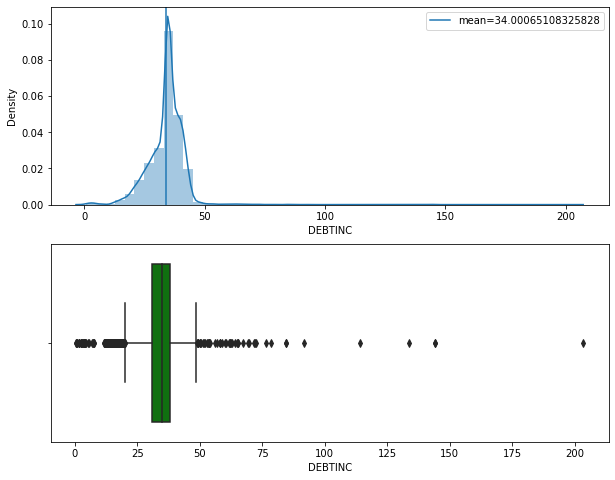

In [20]:
f = plt.figure(figsize=(10,8))

f.add_subplot(2,1,1)
sns.distplot(df['DEBTINC'])
c = df.DEBTINC.mean()
plt.axvline(df['DEBTINC'].mean(), label= (f'mean={c}'))
plt.legend()

f.add_subplot(2,1,2)
sns.boxplot(df['DEBTINC'], color='green')
# plt.savefig('./storage/fitur debtinc.png')

berdasarkan grafik di atas, rata-rata Debt-to income ratio dari seluruh sample pemohon sekitar 34% 

# 5.BIVARIATE ANALYSIS

## 5.1 FITUR REASON dan FITUR TARGET

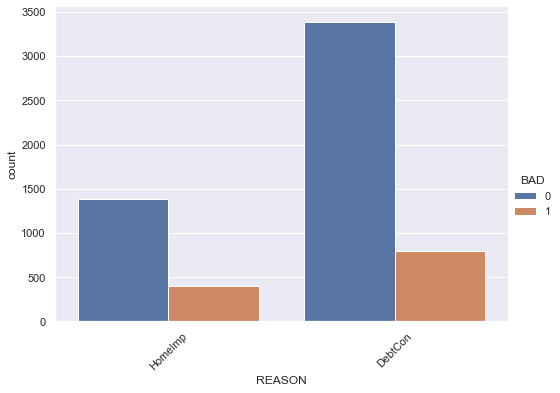

In [51]:
sns.catplot(x='REASON', hue='BAD', kind='count', data=df, height=5, aspect=11.7/8.27)
plt.xticks(rotation=45)
plt.show()
# plt.savefig('./storage/fitur reason x fitur target.png')

Dari countplot di atas, 
1. jumlah pemohon yang mengajuakan pinjaman dengan tujuan HomeImp dan diterima > jumlah lender yang mengajukan pinjaman dengan tujuan HomeImp dan ditolak.

2.  jumlah pemohon yang mengajuakan pinjaman dengan tujuan DebitCon dan diterima > jumlah lender yang mengajukan pinjaman dengan tujuan DebitCon dan ditolak.

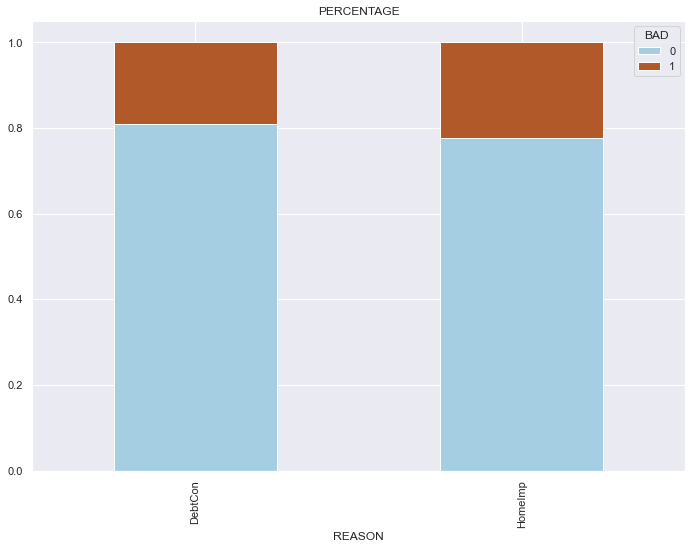

In [52]:
df.groupby("REASON")['BAD'].value_counts(normalize=True).unstack().plot(kind='bar', stacked='True', colormap='Paired')
plt.title('PERCENTAGE')
plt.show()
# plt.savefig('./storage/fitur reason x fitur target 2.png')

Jika kita lihat pada kedua kelas , persentase pemohon yang diterima hampir sama yaitu sekitar 80% dari total sample masing-masing kelas.

# 5.2 FITUR DEROG dan FITUR TARGET

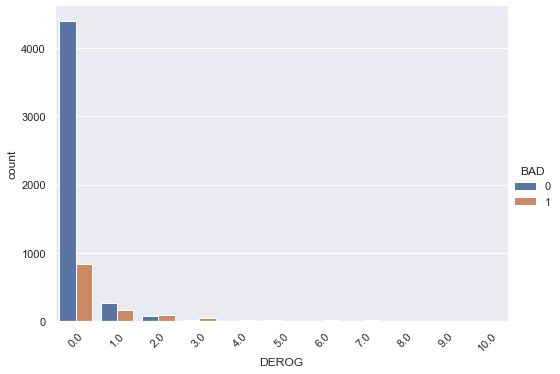

In [53]:
sns.catplot(x='DEROG', hue='BAD', kind='count', data=df, height=5, aspect=11.7/8.27)
plt.xticks(rotation=45)
plt.show()
# plt.savefig('./storage/fitur derog x fitur target.png')

Paling banyak pemohon yang diterima berasal dari jumlah derogatori yang masih 0

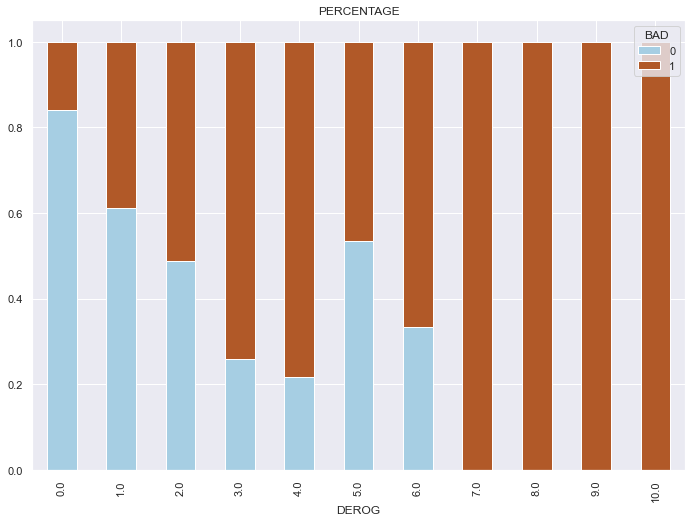

In [54]:
df.groupby("DEROG")['BAD'].value_counts(normalize=True).unstack().plot(kind='bar', stacked='True', colormap='Paired')
plt.title('PERCENTAGE')
plt.show()
# plt.savefig('./storage/fitur derog x fitur target 2.png')

jika kita perhatikan kelas dengan jumlah 0 derogatori, persentase pemohon untuk diterima sekitar 85% dari total sample pada kelas tersebut dan jika kita perhatikan secara umum bahwa semakin besar jumlah laporan derogatori maka persentase untuk diterima semakin kecil 

## 5.3 FITUR DELINQ dan FITUR TARGET

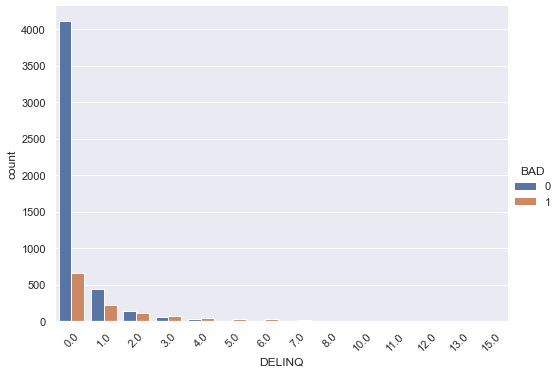

In [55]:
sns.catplot(x='DELINQ', hue='BAD', kind='count', data=df, height=5, aspect=11.7/8.27)
plt.xticks(rotation=45)
plt.show()
# plt.savefig('./storage/fitur delinq x fitur target.png')

Paling banyak pemohon yang diterima berasal dari jumlah delinquent yang masih 0

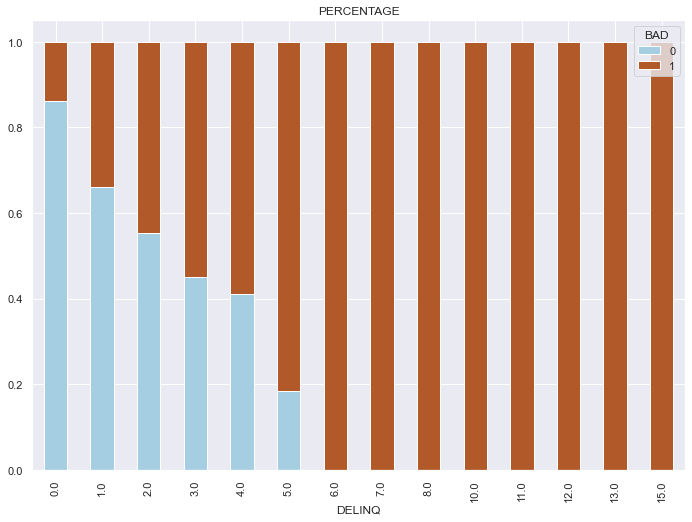

In [56]:
df.groupby("DELINQ")['BAD'].value_counts(normalize=True).unstack().plot(kind='bar', stacked='True', colormap='Paired')
plt.title('PERCENTAGE')
plt.show()
# plt.savefig('./storage/fitur delinq x fitur terget 2.png')

jika kita perhatikan kelas jumlah 0 delinquent, persentase pemohon untuk diterima sekitar 85% dari total sample pada kelas tersebut dan jika kita perhatikan semakin besar jumlah laporan delinquent maka persentase untuk diterima semakin kecil.

## 5.4 FITUR NINQ dan FITUR TARGET

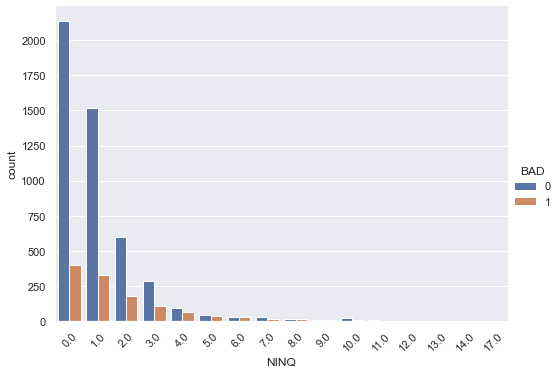

In [57]:
sns.catplot(x='NINQ', hue='BAD', kind='count', data=df, height=5, aspect=11.7/8.27)
plt.xticks(rotation=45)
plt.show()
# plt.savefig('./storage/fitur ninq x fitur target.png')

Paling banyak pemohon yang diterima berasal dari jumlah kredit inkuiri yang masih 0

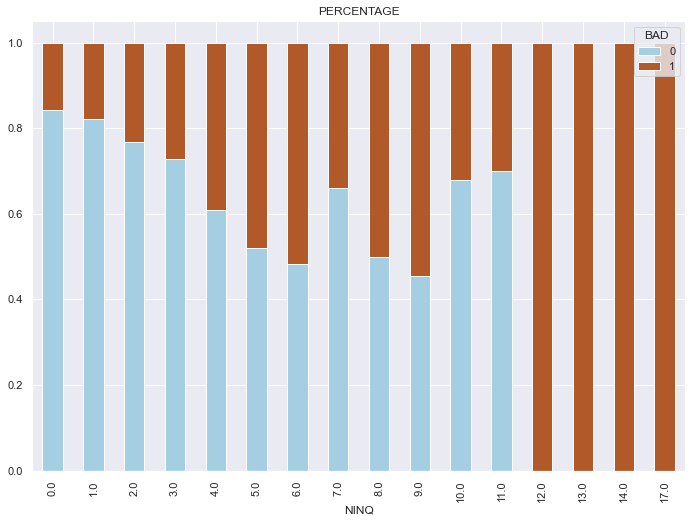

In [58]:
df.groupby("NINQ")['BAD'].value_counts(normalize=True).unstack().plot(kind='bar', stacked='True', colormap='Paired')
plt.title('PERCENTAGE')
plt.show()
# plt.savefig('./storage/fitur ninq x fitur target 2.png')

jika kita perhatikan kelas jumlah 0 kredit inkuiri, persentase pemohon untuk diterima sekitar 83% dari total sample pada kelas tersebut dan jika kita perhatikan kelas dengan jumlah kredit inkuiri >= 12, persentase untuk ditolak hampir 100%.

## 5.5 FITUR CLAGE dan FITUR TARGET

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


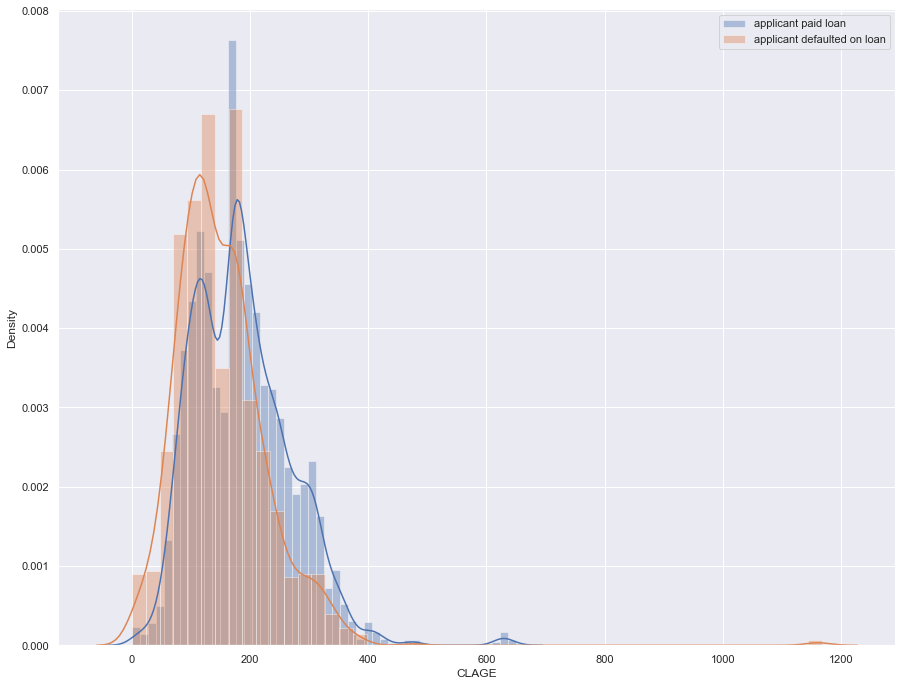

In [59]:
# hipotesis: 

sns.set(rc={'figure.figsize':(15,11.7)})
sns.distplot(df[df['BAD'] == 0]['CLAGE'], label='applicant paid loan')
sns.distplot(df[df['BAD'] == 1]['CLAGE'], label='applicant defaulted on loan')
plt.legend()
plt.show()
# plt.savefig('./storage/fitur clage x fitur target.png')

Jika kita perhatikan pada saat nilai CLAGE > 200, total pemohon yang diterima lebih besar dibandingkan dengan yang ditolak<br>
karena  pemohon yang telah lama melakukan transaksi kredit dengan bijaksana lebih berpeluang besar pengajuannya diterima, salah satunya faktornya pemohon tersebut dapat mengatur keuangannya dengan baik.


## 5.7 FITUR DEBTINC dan FITUR TARGET

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


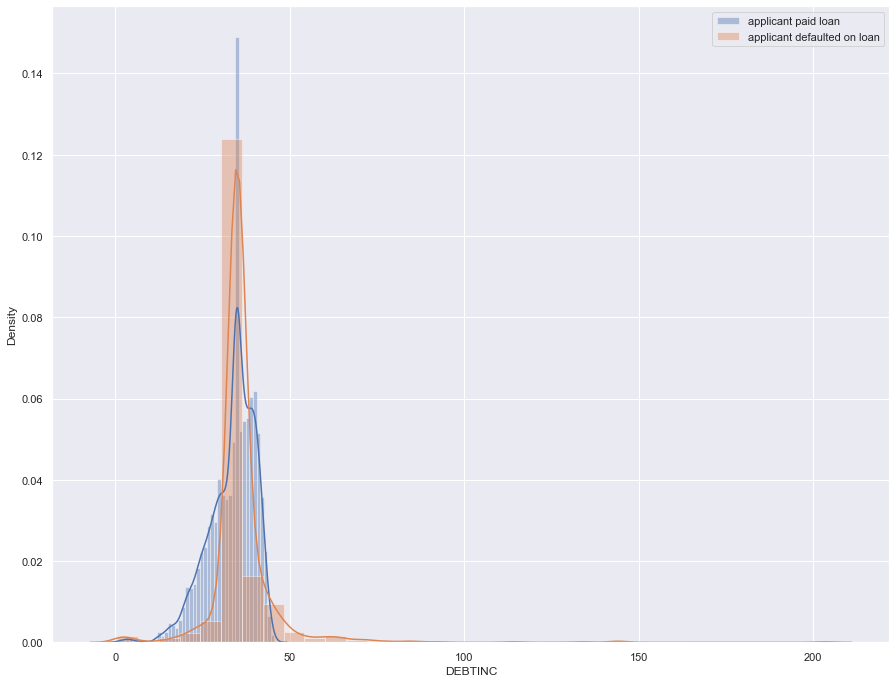

In [60]:
sns.set(rc={'figure.figsize':(15,11.7)})
sns.distplot(df[df['BAD'] == 0]['DEBTINC'], label='applicant paid loan')
sns.distplot(df[df['BAD'] == 1]['DEBTINC'], label='applicant defaulted on loan')
plt.legend()
plt.show()
# plt.savefig('./storage/fitur debtinc x fitur target.png')

Terlihat dari grafik di atas, jika pemohon memiliki rasio utang terhadap pendapatan > 40% akan ditolak. Salah satu sebabnya pemohon tidak bisa mengatur keuangannya dengan baik, Debtinc juga mempengaruhi skor kredit. 

karena semakin besar rasio utang pemohon terhadap penghasilan maka semakin rendah skor kredit yang pemohon miliki. Skor kredit menjadi faktor utama diterimanya pinjaman melalui Home Equity Loan.

# 6. MULTIVARIATE ANALYSIS

## 6.1 FITUR DEROG, DEBTINC, BAD

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 94.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 64.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 41.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

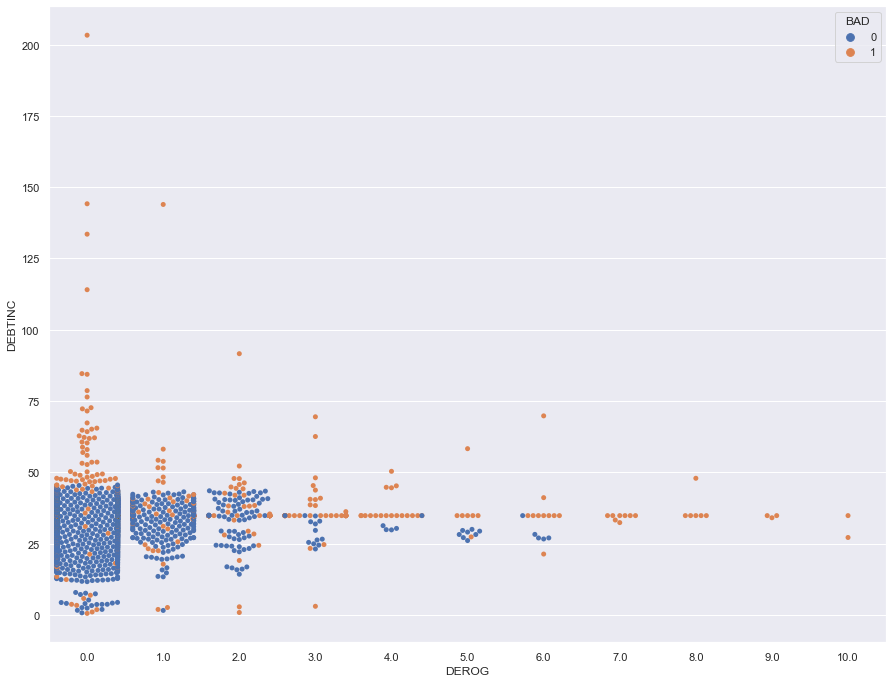

In [61]:
sns.swarmplot(y="DEBTINC", x="DEROG", hue="BAD", data=df)
plt.show()
# plt.savefig('./storage/fitur derog x fitur debtinc x fitur target.png')

## 6.2 FITUR DELINQ, DEBTINC, BAD

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 94.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 77.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 57.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 48.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

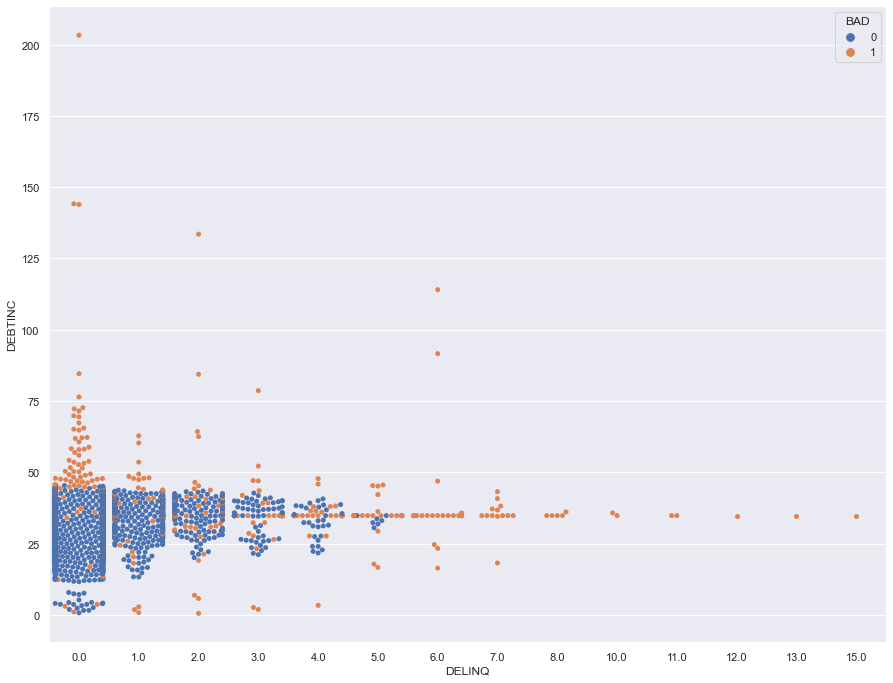

In [62]:
sns.swarmplot(y="DEBTINC", x="DELINQ", hue="BAD", data=df)
plt.show()
# plt.savefig('./storage/fitur delinq x fitur debtinc x fitur target.png')

# 7 KORELASI

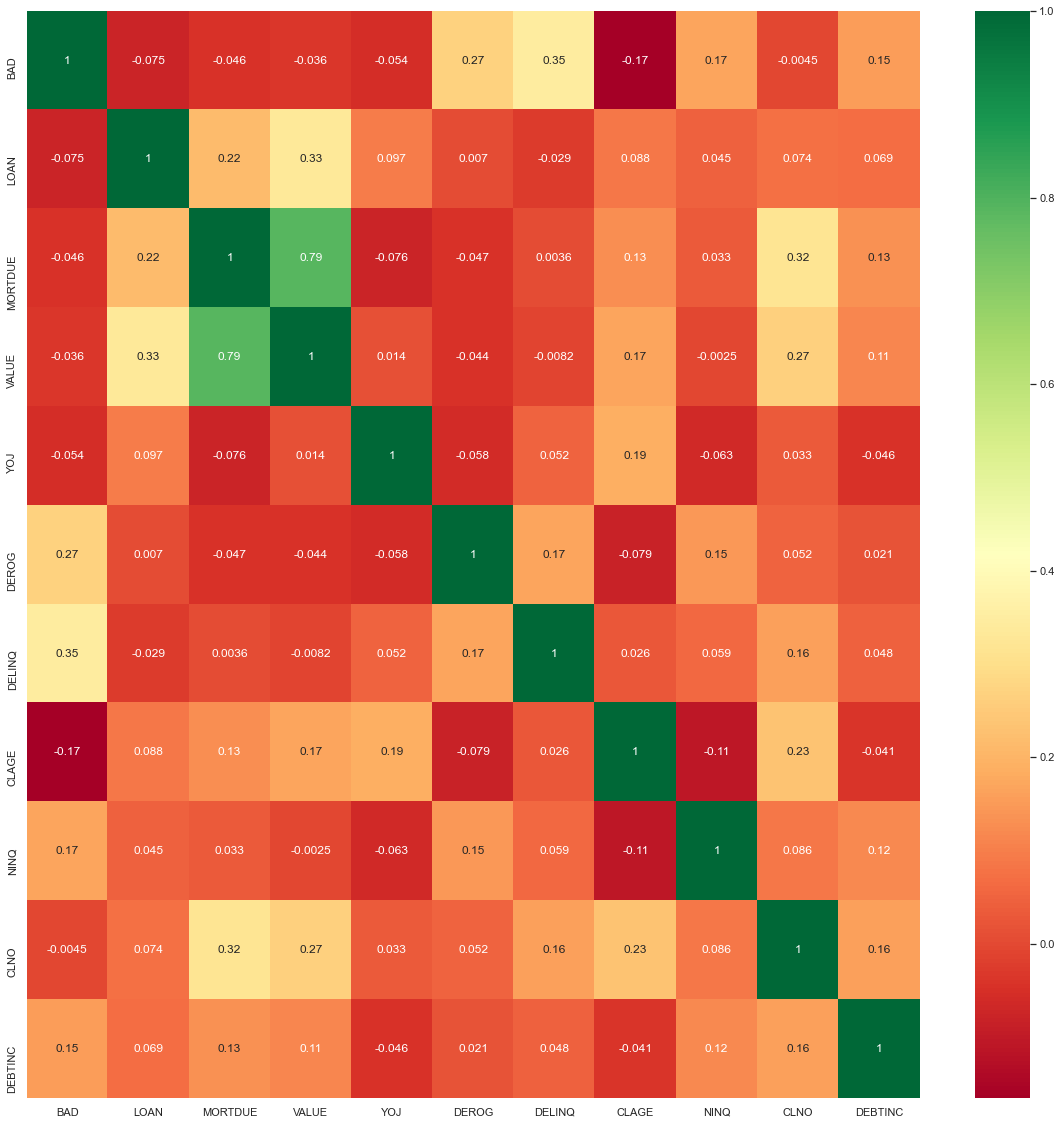

In [63]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder  
k=15  
data = df
labelencoder1_corr = LabelEncoder().fit(data.iloc[:,0])  
data.iloc[:,0] = labelencoder1_corr.transform(data.iloc[:,0])                     
corrmat = data.corr()    
top_corr_features = corrmat.index      
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
# plt.savefig('./storage/korelasi.png')

Berdasarkan tabel HeatMap, dapat dilihat bahwa fitur VALUE dan MORTDUE terjadi Multikolerasi. Oleh karena itu pada tahap modelling kedua fitur tidak akan didrop, tetapi akan dilakukan PCA.